In [1]:
# 단층 퍼셉트론 이용하면 AND NAND OR 게이트를 쉽게 구현 가능 
# AND 게이트 구현 

# AND 게이트의 경우에는 두 개의 입력 값이 모두 1인 경우만 output 1 아닌 경우는 0 
# input : x1 , x2 / output : y 

# x1 = 0 , 0 , 1 , 1 
# x2 = 0 , 1 , 0 , 1 
# y  = 0 , 0 , 0 , 1 


# AND 게이트를 만족하는 두 개의 가중치와 편향 값에는 뭐가 있는가 ?!
# w1 , w2 , b 라고 한다면 (W : 가중치 B 편향 값)
# 다양한 가중치와 편향의 조합이 나올수 있다.
# ex) [0.5, 0.5, -0.7] [0.5, 0.5, -0.8] [1.0 , 1.0 , -1.0]

def AND_gate(x1, x2):
    w1 = 0.5
    w2 = 0.5
    b = -0.7
    
    result = x1 * w1 + x2 * w2 + b # 단층 퍼셉트론 공식 = y
    
    if result <= 0:
        return 0
    else:
        return 1
    
# x1 = 0, 0, 1, 1
# x2 = 0, 1, 0, 1
# reuslt y = 0 , 0 , 0 , 1
    
AND_gate(0,0) , AND_gate(0,1) , AND_gate(1,0) , AND_gate(1,1)

(0, 0, 0, 1)

In [2]:
# 단층 퍼셉트론 NAND 게이트 구현 
# NAND 게이트 경우 두개의 입력값이 1인 경우에만 출력값이 0 나머지는 쌍에 대해서는 모두 출력값 1

def NAND_gate(x1, x2):
    w1 = -0.5
    w2 = -0.5
    b = 0.7
    
    result = x1 * w1 + x2 * w2 + b # 단층 퍼셉트론 공식 = y
    
    if result <= 0:
        return 0
    else:
        return 1
    
# x1 = 0, 0, 1, 1
# x2 = 0, 1, 0, 1
# result y = 1, 1, 1, 0
    
NAND_gate(0,0) , NAND_gate(0,1) , NAND_gate(1,0) , NAND_gate(1,1)

(1, 1, 1, 0)

In [3]:
# 단층 퍼셉트론 OR_gate(x1, x2): 
# 두 값이 0, 0 - > 0 , 0 1이나 1 0  -> 1  두값이 서로 다르면 1

def OR_gate(x1, x2):
    # thinking 
    # w1 , w2 , b [가중치, 가중치, 편향] 을 줄것인가 생각해보기
    w1 = 0.5
    w2 = 0.5
    b = -0.4
    
    result = x1 * w1 + x2 * w2 + b # 단층 퍼셉트론 공식 = y
    
    if result <= 0:
        return 0
    else:
        return 1

OR_gate(0,0) , OR_gate(0,1) , OR_gate(1,0) , OR_gate(1,1)

(0, 1, 1, 1)

In [ ]:
# 참고 -> XOR 게이트를 구하는 것은 불가능합니다. 
# XOR 게이트 입력값 두 개가 서로 다른 값을 갖고 있을때만 출력값이 1이 되고 
# 입력값이 두 개가 서로 같은 값을 가지면 출력값이 0이 되는 게이트 입니다.
# 그 이유는 단층 퍼셉트론은 직선 하나로 두 영역을 나눌 수 있는 문제에 대해서만 구현이 가능하기 때문입니다.

In [4]:
# 파이토치로 다층 퍼셉트론 구현하기

import torch
import torch.nn as nn
from tqdm.notebook import tqdm

# GPU 연산이 가능하다면 Random seed 

# GPU가 사용가능한 여부 파악 test code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)

if device == 'cuda' :
    torch.cuda.manual_seed_all(777)
    
# XOR 문제를 풀기 위한 입력과 출력을 정의 
# x = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
# y = torch.FloatTensor([[0] , [1], [1], [0]]).to(device)

# cpu test code
x = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [[0], [1], [1], [0]]

x = torch.tensor(x, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.float32)

# 참고 
# CrossEntropy 경우에는 마지막 레이어 노드수가 2개 이상이여야 한다.
# 만약 마지막 층에 1개 output 이라면 BCELoss를 사용할때가 있다.
# BCELoss 함수를 사용할 경우에는 먼저 마지막 레이어의 값이 0~1로 조정을 해줘야한다.
# 따라서 BCELoss 함수를 쓸땐 마지막 레이어를 시그모이드 함수를 적용시켜야함 !! 

# 이제 다층 퍼셉트론을 설계합니다. 아래는 입력층 , 은닉층1 은닉층2 은닉층3 출력층 을 가지는 은닉층이 3개인 인공 신경망
# CPU
model = nn. Sequential(
    nn.Linear(2, 10, bias = True), # input_layer = 2 hidden_layer1 = 10
    nn.Sigmoid(),
    nn.Linear(10, 10, bias = True), # hidden_layer1 = 10 hidden_layer2 = 10
    nn.Sigmoid(),
    nn.Linear(10, 10, bias = True), # hidden_layer2 = 10 hidden_layer3 = 10
    nn.Sigmoid(),
    nn.Linear(10, 1, bias = True), # hidden_layer3 output_layer = 1
    # 우리가 사용할 Loss가 BCELoss 이므로 마지막 레이어를 시그모이드 함수를 적용
    nn.Sigmoid(),
).to(device)

In [5]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1) # modified learning rate from 0.1 to 1

In [6]:
# 10000번의 에포크를 수행합니다. 각 에포크 마다 역전파가 수행된다고 보시면됩니다.

for epoch in tqdm(range(10001)):
    # 설명 필요
    optimizer.zero_grad()
    
    # forward 연산
    hypothesis = model(x)
    
    loss = criterion(hypothesis, y)
    loss.backward()
    optimizer.step()
    
    # 100의 배수에 해댕되는 에포크 마다 loss print
    if epoch % 100 == 0:
        print(epoch, loss.item()) # loss print test code

0 0.6948983669281006
100 0.6931580305099487
200 0.6931577920913696
300 0.6931574940681458
400 0.6931572556495667
500 0.6931570172309875
600 0.6931567192077637
700 0.6931565403938293
800 0.6931562423706055
900 0.6931560635566711
1000 0.693155825138092
1100 0.6931555271148682
1200 0.6931553483009338
1300 0.6931551098823547
1400 0.6931549310684204
1500 0.6931546926498413
1600 0.6931544542312622
1700 0.6931542158126831
1800 0.693153977394104
1900 0.6931537389755249
2000 0.6931535005569458
2100 0.6931533217430115
2200 0.6931531429290771
2300 0.693152904510498
2400 0.693152666091919
2500 0.6931524276733398
2600 0.6931522488594055
2700 0.6931519508361816
2800 0.6931517720222473
2900 0.693151593208313
3000 0.6931514143943787
3100 0.6931511163711548
3200 0.6931509375572205
3300 0.6931507587432861
3400 0.693150520324707
3500 0.6931503415107727
3600 0.6931501626968384
3700 0.6931499242782593
3800 0.693149745464325
3900 0.6931494474411011
4000 0.6931493282318115
4100 0.6931490898132324
4200 0.6931

In [7]:
# 학습된 다층 퍼셉트론의 예측값 확인하기
with torch.no_grad():
    hypothesis = model(x)
    predicted = (hypothesis > 0.5).float()
    acc = (predicted == y).float().mean()
    print('모델의 출력값 Hypothesis \n', hypothesis.detach().cpu().numpy())
    print('모델의 예측값 Predicted \n', hypothesis.detach().cpu().numpy())
    print('실제값(Y) \n', y.cpu().numpy())
    print('정확도(Accuracy)', acc.item())
    
# 실제값은 0, 1, 1, 0이며 예측값은 0, 1, 1, 0으로 문제를 해결하는 모습을 보여줍니다.

모델의 출력값 Hypothesis 
 [[0.5000809 ]
 [0.4999472 ]
 [0.5000982 ]
 [0.49994618]]
모델의 예측값 Predicted 
 [[0.5000809 ]
 [0.4999472 ]
 [0.5000982 ]
 [0.49994618]]
실제값(Y) 
 [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy) 0.5


In [8]:
# 다층 퍼셉트론을 이용한 XOR_gate 구현 

import numpy as np

def AND_gate(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x)+b
    if tmp <= 0:
        return 0
    else:
        return 1
    
def NAND_gate(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x)+b
    if tmp <= 0:
        return 0
    else:
        return 1
    
def OR_gate(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x)+b
    if tmp <= 0:
        return 0
    else:
        return 1
    
def XOR_gate(x1, x2):
    s1 = NAND_gate(x1, x2)
    s2 = OR_gate(x1, x2)
    y = AND_gate(s1, s2)
    return y

XOR_gate(0, 0), XOR_gate(0, 1), XOR_gate(1, 0), XOR_gate(1, 1)

(0, 1, 1, 0)

In [9]:
# 다중 퍼셉트론으로 손글씨 분류 
# 다층 퍼셉트론 구현하고 딥 러닝을 통해서 숫자 필기 데이터를 분류 
# 사이킷런 패키지에서 제공하는 분류용 예제 데이터를 이용 
# 0 ~ 9 까지의 숫자를 손으로 쓴 이미지 데이터로 load_digits() 명령으로 로드 
# 각 image 사이즈 8 * 8 = 64 픽셀 해상도의 흑백 이미지 , 이미지 갯수 : 1,797개

import matplotlib.pyplot as plt # python as 애칭 (시각화 라이브러리)
from sklearn.datasets import load_digits

digits = load_digits() # 1,979개 이미지 데이터 로드

# 첫번째 샘플을 출력 .images[인덱스]를 사용하면 해당 인덱스 이미지 행렬로서 출력가능
# 8 x 8 행렬 출력 
# 0을 흰색 도화지 , 0보다 큰 숫자들을 검정색으로 상상해보면 숫자 0에 실루엣처럼 보임
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [10]:
# 실제로 레이블도 숫자 0 인지 첫번째 샘플레이어 확인
print(digits.target[0])

# 실제 셈플의 레이블이 몇개인지 확인 
# len() 함수를 이용하여 전체 이미지 갯수를 파악한다.
print("전체 샘플의 수:", len(digits.images))

0
전체 샘플의 수: 1797


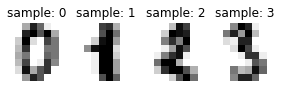

In [11]:
# 상위 5개만 샘플이미지를 확인
# zip 설명 images 와 target 을 하나로 묶기 위한것 
"""
 image = [1, 2, 3, 4]
 label = [사과, 자몽, 바나나, 수박]
 list(zip(images, label))
 1 사과 , 2 자몽 3 바나나 4 수박 
"""
images_and_lables = list(zip(digits.images, digits.target))

# enumerate 설명이 필요 
# 이미지 시각화
for index, (image, label) in enumerate(images_and_lables[:4]):
    plt.subplot(2, 5, index + 1) # input (이미지 target, 보여줄 이미지 갯수, 반복 )
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

In [12]:
# 상위 5개의 레이블 확인 
# range 설명필요
for i in range(5):
    # label test print code
    print(i, "번 index sample label: ", digits.target[i])

0 번 index sample label:  0
1 번 index sample label:  1
2 번 index sample label:  2
3 번 index sample label:  3
4 번 index sample label:  4


In [13]:
# 이제 훈련 데이터 와 레이블을 각 x y 저장 
# images sample 8x8 행렬로 저장 

# digits.data 를 사용 8x8 -> 64차원의 백터로 변환해서 저장한 상태

# data test print code
# 64차원의 백터로 저장된것을 확인
print(digits.data[0])

x = digits.data # 이미지
y = digits.target # 각 이미지 레이블

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [14]:
# 다층 퍼셉트론 분류기 만들기 

# 파이토치 기초 필요 
# Loss funtion 등등이 필요

import torch
import torch.nn as nn
from torch import optim

model = nn.Sequential (
    
    nn.Linear(64, 32), # input_layer = 64 hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16), # input_layer = 32 hidden_layer1 = 16
    nn.ReLU(),
    nn.Linear(16, 10) # input_layer = 16 hidden_layer1 = 10
    # CrossEntropyLoss() : output_layer = 2 이상인 경우
)

x = torch.tensor(x, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.int64)

loss_fn = nn.CrossEntropyLoss() # 이 함수는 소프트맥스 함수를 포함

optimizer = optim.Adam(model.parameters())

losses = []

for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print('Epoch {:4d}/{} loss : {:.6f}'.format(epoch, 100, loss.item())) # train print code
        
    losses.append(loss.item()) # append 설명

Epoch    0/100 loss : 2.381843
Epoch   10/100 loss : 2.086941
Epoch   20/100 loss : 1.844466
Epoch   30/100 loss : 1.555474
Epoch   40/100 loss : 1.246410
Epoch   50/100 loss : 0.968091
Epoch   60/100 loss : 0.724377
Epoch   70/100 loss : 0.519714
Epoch   80/100 loss : 0.380598
Epoch   90/100 loss : 0.293386


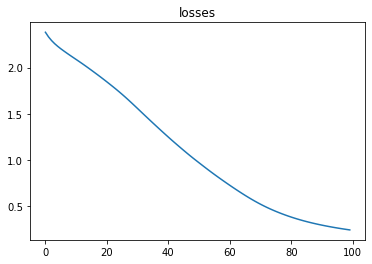

In [15]:
plt.title('losses')
plt.plot(losses)